### Introduction

This data set was created to calculate the probability of the patient having a heart condition. Patients are graded by numbering 0-4. (No 0, 4 high). 

*Bu veri seti hastanın kalp rahatsızlığı olma ihtimalini hesaplamak için oluşturulmuştur. 0-4 arası numaralandırma ile hastalar derecelendirilir. (0 yok, 4 yüksek) *

**Attributes**
> sex (1 = male; 0 = female)




In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
# read csv file
df = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')
# show top 5 files
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# show colums's name of dataframe
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
# this method shows colums type int, float or boolean etc. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Correlation map 
# 2 özellik arasındaki ilişliyi gösterir 
df.corr().head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239


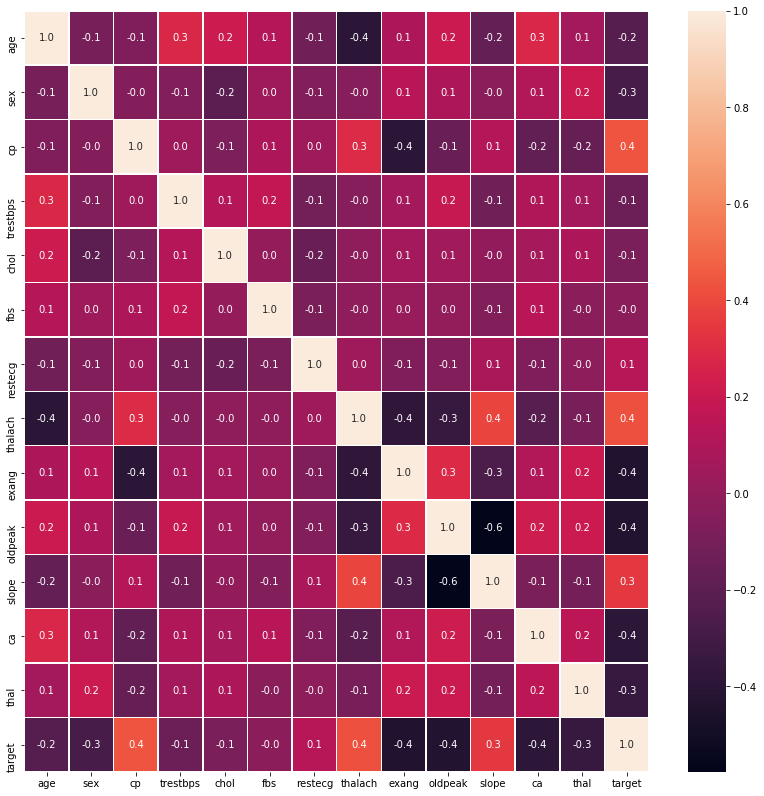

In [6]:
f,ax = plt.subplots(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)

*Bu tabloya göre;*

Pozitif correlationlar(high to low) / Arttıkça artan doğru orantı
1. Age - Target (0.4)
2. Age - Trestbps (0.3)
3. Age - Ca (0.3)

Negatif Correlationlar (h to l) / Arttıkça azalan ters orantı
1. Oldpeak - Slope ( -0.6)
2. Age - Thalach ( -0.4)
3. Cp - Exang ( - 0.4)
4. Thalach - Exang ( - 0.4)
5. Exang - Target ( -0.4)
6. Oldpeak - Target ( -0.4)
7. Ca - Target ( -0.4)


## Matplotlib

> 1. Line Plot

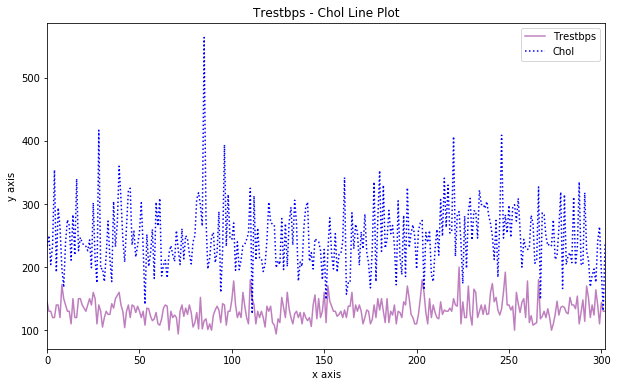

In [7]:
# grafiğin boyutunu ayarlama
plt.figure(figsize=(10,6))

# Grafikte görülecek datalar
df.trestbps.plot(kind= 'line', color='purple', label='Trestbps', alpha=.5, linestyle='-')
df.chol.plot(kind='line', color='b', label='Chol', linestyle=':')

plt.legend(loc='upper right')
plt.xlabel('x axis') #kişi sayısını gösteriyor diye düşünüyorum
plt.ylabel('y axis')
plt.title('Trestbps - Chol Line Plot')
plt.show()

### Subplot

Text(0, 0.5, 'Age')

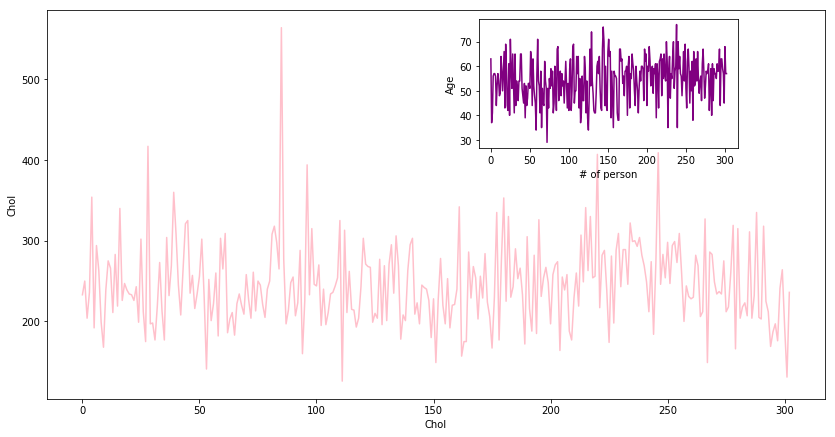

In [8]:
f = plt.figure(figsize=(12,6))

#grafik koordinatlarını belirleme
ax1 = f.add_axes([0.1, 0.1, 0.9, 0.9])
ax2 = f.add_axes([0.6, 0.68,0.3,0.3])

#verileri grafiğe ekleme
ax1.plot(df.chol, color='pink')
ax2.plot(df.age, color='purple')

# X ekseni başıklar
ax1.set_xlabel('Chol')
ax2.set_xlabel('# of person')

# y ekseni başlıklar
ax1.set_ylabel('Chol')
ax2.set_ylabel('Age')

> Scatter Plot

2 özellik arasındaki correlationı görmek için kullanılır

Text(0.5, 1.0, 'trestbps - thalach')

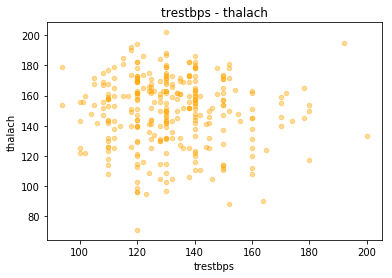

In [9]:
df.plot(kind='scatter', x='trestbps', y='thalach', color='orange', alpha='0.4')
plt.xlabel('trestbps')
plt.ylabel('thalach')
plt.title('trestbps - thalach')

> Histogram Plot

Distribution için kullanılır

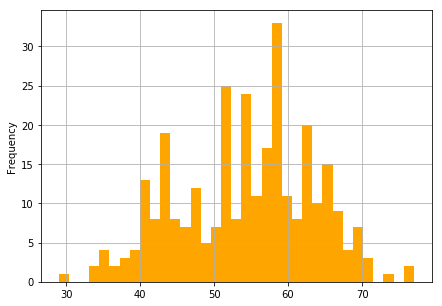

In [10]:
df.age.plot(kind='hist', color='orange', bins=35, figsize=(7,5), grid=True)
plt.show()

# bu grafikte kişilerin en çok 58-59 yaşlarında oldukları verisine varılabilinir.

In [11]:
dataframe = df['age']>60
df[dataframe].head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
23,61,1,2,150,243,1,1,137,1,1.0,1,0,2,1


In [12]:
# Yaşı 40'dan küçük, trestbps'i 120 olan kişiler
dataframe = df[ (df['age']<40) & (df['trestbps']==120) ]
dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
115,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1
227,35,1,0,120,198,0,1,130,1,1.6,1,0,3,0
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0


In [13]:
# dictionary'de for loop
dataframe = df['age']
count1=0
count2=0
count3=0
count4=0

for key, value in dataframe.items():
    if value<30:
        count1+=1
    elif value>=30 and value<40:
        count2+=1
    elif value>=40 and value<50:
        count3+=1
    else:
        count4+=1
        
print(count1,' kişi 30dan küçüktür')
print('')
print(count2,' kişi 30 ile 40 yaş arasındadır')
print('')
print(count3,' kişi 40 ile 50 yaş arasındadır')
print('')
print(count3,' kişinin yaşı 50den büyüktür')

1  kişi 30dan küçüktür

15  kişi 30 ile 40 yaş arasındadır

72  kişi 40 ile 50 yaş arasındadır

72  kişinin yaşı 50den büyüktür
